#111-1 Computational Physics (I) Midterm Presentation 
by 劉仲楷 B10202012 

# Introduction

![image](https://drive.google.com/uc?export=view&id=1wesDZTapwBCwm_GqakH_J-rJDKaDkmw2)

1. Pandas stands for "Panel Data", and "Python Data Analysis"; written by C, Cython, Python

2. Pandas can be applied for data 
    * analyzing
    * cleaning 
    * exploring
    * manipulating
    * or ... just simply thinking as MS Excel XD

3. Numpy, Pandas and Scikit Learn are all work together in data science field


![image](https://drive.google.com/uc?export=download&id=1jJ6ukAVMuw76hSVFayfIMibhae68yqAa)

# Demo

## Pre precessing

In [1]:
from urllib.request import urlopen
import json
import pandas as pd
import csv
import scipy.optimize as opt
import numpy as np

In [2]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2022-11-17 23:58:08--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 74.125.23.100, 74.125.23.102, 74.125.23.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.23.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ofo2nucr4ts8thhhhkcviui5414o3ss4/1668729450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=433df6c9-3a4a-4cc3-9fdf-5725532e3ef6 [following]
--2022-11-17 23:58:12--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ofo2nucr4ts8thhhhkcviui5414o3ss4/1668729450000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_?uuid=433df6c9-3a4a-4cc3-9fdf-5725532e3ef6
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 142.250.157.132, 2404:6800:4008:c13::84
Connecting to doc-0k-9o

## 讀取資料 cleaning data

In [3]:
url = "http://tcgmetro.blob.core.windows.net/stationod/%E8%87%BA%E5%8C%97%E6%8D%B7%E9%81%8B%E6%AF%8F%E6%97%A5%E5%88%86%E6%99%82%E5%90%84%E7%AB%99OD%E6%B5%81%E9%87%8F%E7%B5%B1%E8%A8%88%E8%B3%87%E6%96%99_202210.csv"
df = pd.read_csv(url)

In [4]:
url = "https://data.taipei/api/frontstage/tpeod/dataset/resource.download?rid=e334318b-fe87-4239-9097-495d21ad5f49"
df_station = pd.read_csv(url,encoding = 'cp950')
df_station["出入口名稱"] = df_station["出入口名稱"].apply(lambda x: x[:x.rfind("站")])
df_station.iloc[160,3],df_station.iloc[160,4] = df_station.iloc[160,4], df_station.iloc[160,3]
df_station_loc = df_station.groupby("出入口名稱").mean()
banqiao = df_station_loc.loc["板橋"]
df_station_loc = df_station_loc.rename({"台北車":"台北車站","板橋":"BL板橋","大橋頭":"大橋頭站"}, axis='index')
df_station_loc = df_station_loc.append(banqiao)
df_station_loc = df_station_loc.rename({"板橋":"Y板橋"}, axis='index')

In [ ]:
df_station_loc

## 開始！

### 觀察資料

In [6]:
df.head()

,日期,時段,進站,出站,人次
0,2022-10-01,0,松山機場,松山機場,0
1,2022-10-01,0,松山機場,中山國中,0
2,2022-10-01,0,松山機場,南京復興,0
3,2022-10-01,0,松山機場,忠孝復興,0
4,2022-10-01,0,松山機場,大安,1


In [ ]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9218811 entries, 0 to 9218810
Data columns (total 5 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   日期      object
 1   時段      int64 
 2   進站      object
 3   出站      object
 4   人次      int64 
dtypes: int64(2), object(3)
memory usage: 351.7+ MB


,時段,人次
count,9.218811e+06,9.218811e+06
mean,1.271429e+01,5.796042e+00
std,6.547576e+00,1.692945e+01
min,0.000000e+00,0.000000e+00
25%,8.000000e+00,0.000000e+00
50%,1.300000e+01,1.000000e+00
75%,1.800000e+01,5.000000e+00
max,2.300000e+01,1.959000e+03


In [7]:
df['日期'] = pd.to_datetime(df['日期'])
df['星期'] = df['日期'].apply(lambda x : x.isoweekday())

In [ ]:
df["進站"].value_counts()

松山機場      77469
國父紀念館     77469
台北小巨蛋     77469
松江南京      77469
北門        77469
          ...  
小南門       77469
中正紀念堂     77469
古亭        77469
台電大樓      77469
新北產業園區    77469
Name: 進站, Length: 119, dtype: int64

In [ ]:
totsta = df["進站"].nunique()
print(totsta)
print(df.isnull().sum())

119
日期    0
時段    0
進站    0
出站    0
人次    0
星期    0
dtype: int64


### 統計資料

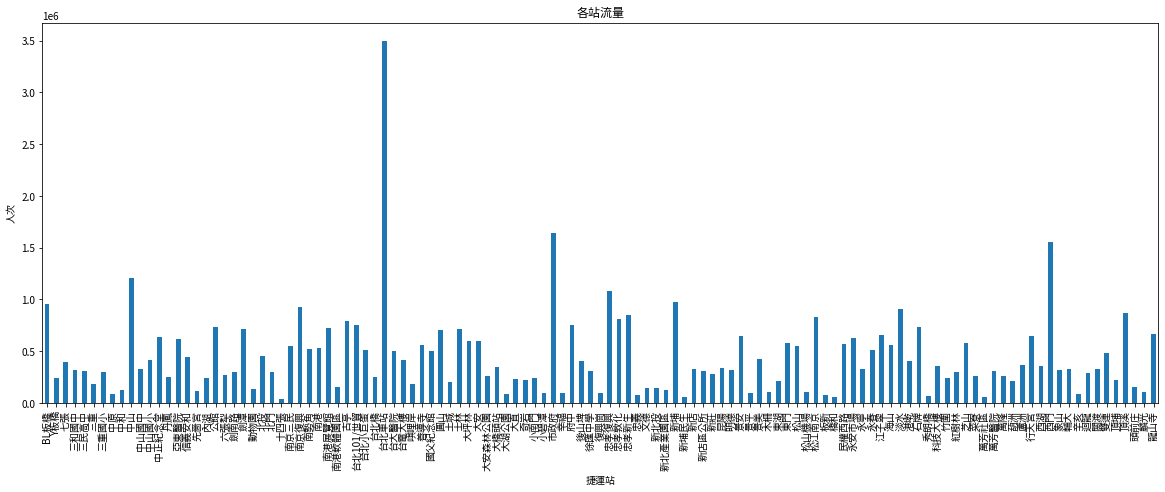

In [ ]:
flow_sta = (df.groupby("進站").sum()["人次"])
            # + df.groupby("出站").sum()["人次"])
flow_sta.plot(kind='bar',figsize=(20,7),xlabel="捷運站",ylabel="人次",title="各站流量");

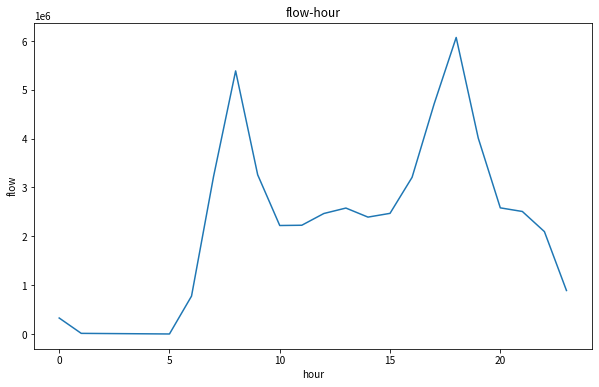

In [ ]:
df.groupby("時段").sum()["人次"].plot(title="flow-hour",ylabel="flow",xlabel="hour",figsize=(10,6));

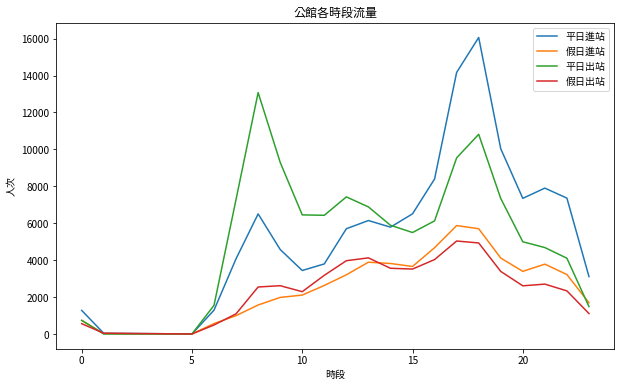

In [ ]:
fig,ax = plt.subplots()
(0.2*df[(df['進站']=="公館") & (df["星期"] != (6 or 7))].groupby("時段").sum())["人次"].plot(title="公館各時段流量",ylabel="人次",xlabel="時段",figsize=(10,6),ax=ax);
(0.5*df[(df['進站']=="公館") & (df["星期"] == (6 or 7))].groupby("時段").sum())["人次"].plot(title="公館各時段流量",ylabel="人次",xlabel="時段",figsize=(10,6),ax=ax);
(0.2*df[(df['出站']=="公館") & (df["星期"] != (6 or 7))].groupby("時段").sum())["人次"].plot(title="公館各時段流量",ylabel="人次",xlabel="時段",figsize=(10,6),ax=ax);
(0.5*df[(df['出站']=="公館") & (df["星期"] == (6 or 7))].groupby("時段").sum())["人次"].plot(title="公館各時段流量",ylabel="人次",xlabel="時段",figsize=(10,6),ax=ax);
ax.legend(["平日進站","假日進站","平日出站","假日出站"]);

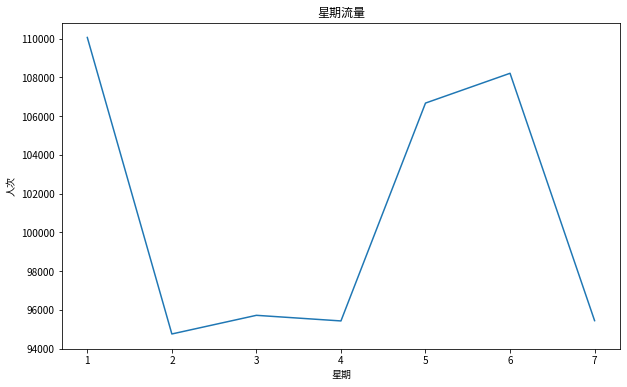

In [ ]:
df[df['出站']=="公館"].groupby("星期").sum()["人次"].plot(figsize=(10,6),ylabel="人次",title="星期流量");

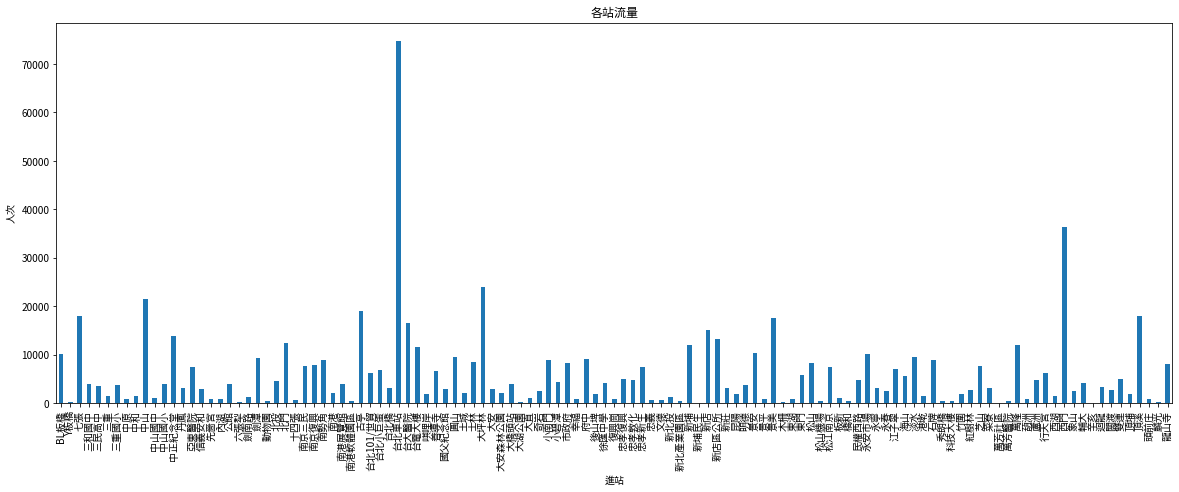

In [ ]:
flow_sta_gongguan = df[df['出站']=="公館"].groupby("進站").sum()["人次"]
flow_sta_gongguan.plot(kind="bar",figsize=(20,7),ylabel="人次",title="各站流量");

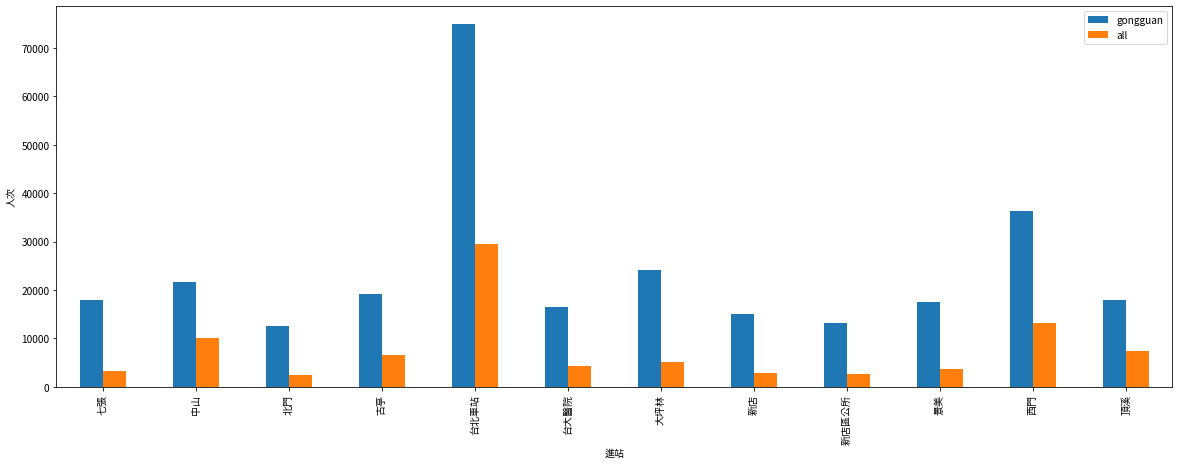

In [ ]:
s = flow_sta_gongguan
p = flow_sta
best_par = 1/totsta
chisq = (p*best_par - s)**2
diff = p*best_par - s
view = pd.concat([s, best_par*p, chisq, diff], axis=1, keys=['gongguan','all','chisq', 'diff'])
view[diff < diff.quantile(0.1)].plot(kind="bar",y=["gongguan","all"],ylabel="人次",figsize=(20,7));

![image](https://web.metro.taipei/pages/assets/images/routemap2020.png)

In [ ]:
y0, x0 = 25.017363, 121.539737
df_station_loc['x'] = (df_station_loc['經度'] - x0)*111194.926644558737
df_station_loc['y'] = (df_station_loc['緯度'] - y0)*111194.926644*np.cos(df_station_loc['經度'])
df_temp = df.groupby(["進站","出站"]).sum().reset_index()
df_temp = df_temp.drop(df_temp[df_temp["進站"]==df_temp["出站"]].index)
df_temp['x1'] = df['進站'].apply(lambda x: df_station_loc.loc[x, 'x'])
df_temp['x2'] = df['出站'].apply(lambda x: df_station_loc.loc[x, 'x'])
df_temp['y1'] = df['進站'].apply(lambda y: df_station_loc.loc[y, 'y'])
df_temp['y2'] = df['出站'].apply(lambda y: df_station_loc.loc[y, 'y'])
df_temp["dist"] = ((df_temp['x1']-df_temp['x2'])**2 + (df_temp['y1']-df_temp['y2'])**2)**0.5

![image](https://drive.google.com/uc?export=download&id=1NV2K_nrTps7kpHLkV-n1w1ZUSn5p07Sq)

### 更多可以嘗試的事


- 實際搭乘路程分佈；近似OO理論分佈
- 不同顏色的線總流量
- 搭乘時間長短分佈

In [ ]:
df_plot = df_temp[df_temp['dist'].quantile(0.001) < df_temp['dist']]
df_plot['dist'].plot(kind="hist",figsize=(10,6),bins=50,weights=df_plot["人次"]);

In [ ]:
brown = ["南港展覽館","南港軟體園區","東湖","葫洲","大湖公園","內湖","文德","港墘","西湖","劍南路","大直","松山機場","中山國中","南京復興","忠孝復興","大安","科技大樓","六張犁","麟光","辛亥","萬芳醫院","萬芳社區","木柵","動物園"]
red = ["新北投","淡水","紅樹林","竹圍","關渡","忠義","復興崗","北投","奇岩","唭哩岸","石牌","明德","芝山","士林","劍潭","圓山","民權西路","雙連","中山","台北車站","台大醫院","中正紀念堂","東門","大安森林公園","大安","信義安和","台北101/世貿","象山"]
green = ["松山","南京三民","台北小巨蛋","南京復興","松江南京","中山","北門","西門","小南門","中正紀念堂","古亭","台電大樓","公館","萬隆","景美","大坪林","七張","新店區公所","新店","小碧潭"]
orange = ["蘆洲","三民高中","徐匯中學","三和國中","三重國小","迴龍","丹鳳","輔大","新莊","頭前庄","先嗇宮","三重","菜寮","台北橋","大橋頭站","民權西路","中山國小","行天宮","松江南京","忠孝新生","東門","古亭","頂溪","永安市場","景安","南勢角"]
blue = ["南港展覽館","南港","昆陽","後山埤","永春","市政府","國父紀念館","忠孝敦化","忠孝復興","忠孝新生","善導寺","台北車站","西門","龍山寺","江子翠","新埔","BL板橋","府中","亞東醫院","海山","土城","永寧","頂埔"]
yellow = ["大坪林","十四張","秀朗橋","景平","景安","中和","橋和","中原","板新","Y板橋","新埔民生","頭前庄","幸福","新北產業園區"]

135